In [1]:
# Bibliotecas 
import pandas as pd
import torch as torch
import numpy as np
import math
import requests
import random
import seaborn as sns

from mpl_toolkits import mplot3d
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier  
from sklearn import preprocessing
from sklearn import utils
from matplotlib.colors import ListedColormap 
import datetime as dt
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
import plotly.express as pt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.filterwarnings("ignore")

## Descripción del conjunto de Datos:

Se escogió el conjunto de datos de del precio historico de las acciones de la compañía Tesla, Inc., interesa por la volitidad del precio y volumen de dispersión, desde 2010 al 2020. El dataset incluye las siguientes variables.

- Date: Fecha diaria donde se describen los distintos precios alcanzados.
- Open: Precio de apertura correspendiente a un día especifico.
- High: Precio más alto que la acción alcanzó en un día determinado.
- Low:  Precio más bajo que la acción alcanzó en un día determinado.
- Adj Close: Último precio antes del precio de cierre.
- Volume: Variable que mide el número de negociaciones de la acción en un día 

Se buscará predecir a través de un modelo de regresión el precio de venta y compra para un día especifico. El dataset puede ser encontrado en https://www.kaggle.com/datasets/timoboz/tesla-stock-data-from-2010-to-2020.

## Preprocesado

In [2]:
df = pd.read_csv('TSLA.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


In [5]:
df_describe = pd.DataFrame(df)
df_describe.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [6]:
list(df.columns.values)

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [7]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
df.drop(['Volume'], axis=1)

,Date,Open,High,Low,Close,Adj Close
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001
...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007


In [10]:
list(df.columns.values)

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [11]:
df.set_index("Date", inplace=True)
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2416 entries, 2010-06-29 to 2020-02-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2416 non-null   float64
 1   High       2416 non-null   float64
 2   Low        2416 non-null   float64
 3   Close      2416 non-null   float64
 4   Adj Close  2416 non-null   float64
 5   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 132.1+ KB


In [13]:
df.shape

(2416, 6)

In [14]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [15]:
df.ndim

2

De acuerdo a la literatura disponible el volumen no es usado, dado que presenta valores muy extremos y que están implicitos la variciones de precio de las acciones, esto en torno al precio de apertura: "Open", precio de cierre "Close", precio máximos alcanzados durante el día: "High, precios mínimos: "Low", y el precio de ajuste se refiere al último precio alcanzado antes del cierre, por lo cual la varianza de estos componentes son útiles para predecir el precio de cierre futuro.

In [16]:
df.drop(['Volume'], axis=1, inplace=True)

In [17]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close'], dtype='object')

## EDA

## Diagrama de Pares: Observaciones

Al relacionar los valores de las columnas de precio de apartura "Open", precio de cierre "Close", precio máximo alcanzado en el día "High", precio mínimo "Low", precio de cierre ajustado "Adj Close" vemos linealidad, lo que significa que los datos tienen una variación muy reducida y siguen la tendencia del movimiento sin valores extremos. Esto es diferente para las relaciones con el volumen, dado que el volumen es el número de acciones negociadas en ese día, por lo que vemos valores extremos que se alejan del grueso de datos en las partes superiores, respondiendo a la volatilidad particular por eventos en el mercado como noticias financieras o rumores acerca del valor futuro de ciertas acciones. 

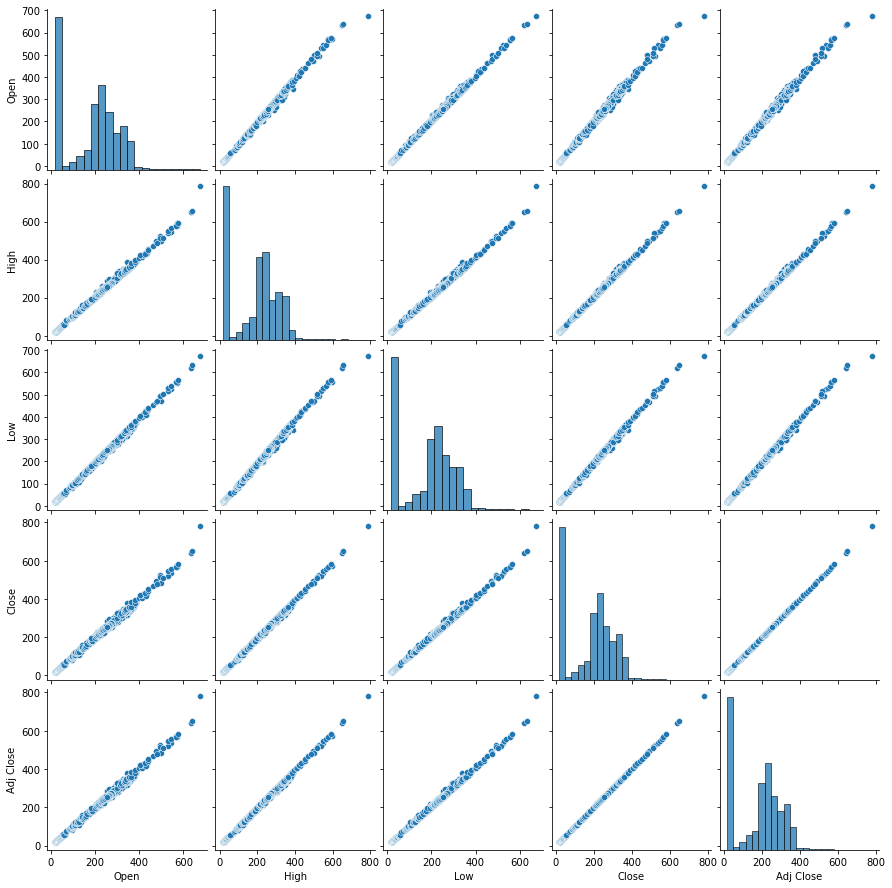

In [18]:
sns.pairplot(df);

## Mapa de Calor: Observaciones

Donde el número representa la línealidad y congruencia en el comportamiento de las acciones, sin valores extremos siguen la misma tendencia. Significa que hay correlación en la variables, lo que hace los datos útiles para ser usados en un modelo de apredizaje automático usando el algoritmo Random Forest. Las variables con menor relación son "Open" & "Adj Close", "Open" & "Close", teniendo esto en cuenta interesa conocer la varianza de las variables. 

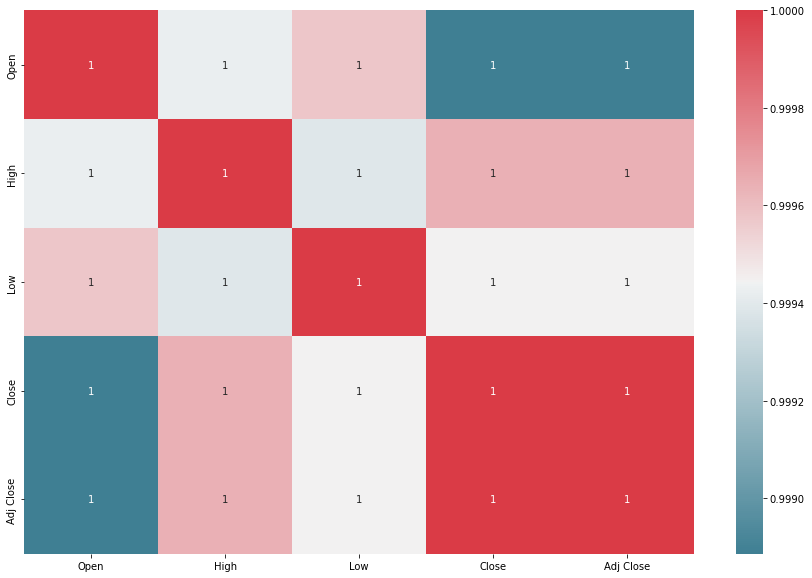

In [19]:
#Mapa de calor 
def correlation_heatmap(df1):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(df)

## Desviación Estandar del precio de cierre

La desviación estantar indica nos indica cuan dispersos están los datos. Se obtuvieron valores por debajo de 200, lo que indica una varianza pequeña, pero todos los valores mantiene magnitudes similares.

In [51]:
print("========================================================")
print("Desviación estandar: variables de las acciones de Tesla")
sd_TSLA = np.std(df)
print((sd_TSLA))

Desviación estandar: variables de las acciones de Tesla
Open         118.715587
High         120.867307
Low          116.833404
Close        119.111362
Adj Close    119.111362
dtype: float64


## Modelo: Random Forest

Se escoge el algoritmo de Random Forest, dado al lado de Redes Neuronales, presenta resultados más exactos. Random Forest puede procesar problemas de clasificación y regresión.

### Paso 1:
Seleccionar las columnas que son númericas y que sirven para entrenar el modelo, define los datos de prueba y entrenamiento, en este caso se escogieron los siguientes valores:

- Open
- High
- Low
- Close
- Adj Close

In [22]:
x = df.iloc[:, 0:5].values
y = df.iloc[:, 4].values

In [23]:
x.shape

(2416, 5)

In [52]:
y.shape

(2416,)

In [ ]:
Se convierten los valores de y a valores categóricos

In [53]:
lab = preprocessing.LabelEncoder()
y = lab.fit_transform(y)

print(y)

[ 112  109   73 ... 2222 2223 2224]


Se dividen los datos de prueba y entrenamiento.

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.26, random_state=0)  

In [27]:
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)   

### Paso 2: 

Construir los árboles de decisión

Primero se evalua un modelo de Random Forest con clasificador, este creará 3 submuestras de evaluación, y luego sacará el promedio de cada una, con esto ayuda a la presición de la predicción y previene el sobre ajuste.

In [28]:
model = RandomForestClassifier(n_estimators= 10, criterion="entropy")  
model.fit(x_train, y_train)  

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [29]:
y_pred= model.predict(x_test)  
print(y_pred)

[1019  259  117 1886  913 1033  178   84 1211 2127 1128 1698  403  619
   37 2058  628 1582  248 1200 2150 1952 1158 2013 1809  779 2005 1664
 1256 1409  191  403  374 1225 2193 1125 1084  663 1918 1122 1827  531
   95 1045  277 1275  860  477 1848 1661 1265 1749  514 1077 1727 1310
  485 1341    2  580 1221  463 1571 1929  201  252 1432 1225   58  408
  420  747 1926  100  450 1801 1832   11   56 1422 1943 1112  584 1078
  523 2021  514 2212   78 1155  263 1964  543 1402  756 1293 2050  354
  270  583  445 1901 1530 2109 1213  314  860  875 1505  174 1268 2098
 1247 2178 1314  714  976 1591 1728   32 1084 1674 1127  198 2080 2129
 1135 2011 1909   38  875 2216   23 1639 1203 2044 2027 1420  963 1005
  214 2085 2154  870   86  179  243  908 1230  645 1409  365  485  104
   55  301   23  847 2176  180 1579  324 1321 1107  435 1162 2090 1897
 1755 1652 1667 1797  998 1233 1886 2133 1173 2181  509 2058 1338  253
 1505  687  344 1383  671   23   17 1185 2094  311 1803 1701 1997 1099
 1309 

### Paso 3

Al igual que su versión de clasificación crea 3 submuestras y retorna un promedio, su diferencia está en que utiliza los hiperparámetros descritos para comparar los resultados.

In [30]:
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(x_train, y_train)
predict = model.predict(x_test)

In [31]:
grid_rf = {
'n_estimators': [20, 50, 100, 500, 1000],  
'max_depth': np.arange(1, 15, 1),  
'min_samples_split': [2, 10, 9], 
'min_samples_leaf': np.arange(1, 15, 2, dtype=int),  
'random_state': [1, 2, 30, 42]
}

rscv = RandomizedSearchCV(estimator=model, param_distributions=grid_rf, cv=3, n_jobs=-1, verbose=2, n_iter=50)
rscv_fit = rscv.fit(x_train, y_train)
best_parameters = rscv_fit.best_params_
print(best_parameters)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'random_state': 42, 'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 9}


In [32]:
print(predict)
print(predict.shape)

[1008.4914      259.16247937  117.23417431 1883.79711429  914.41208571
 1037.62920952  176.12737302   84.99800476 1210.4249     2121.3358381
 1131.11222381 1685.68486429  399.3030619   618.44948571   36.88801905
 2070.70668333  623.2458     1583.13426667  246.93615476 1213.16170476
 2149.87640952 1954.67134127 1158.40892857 2016.39072857 1837.8473
  781.20603333 2006.40958571 1670.26552857 1247.28166667 1403.91843095
  191.57106667  402.6052      373.70490476 1220.29270238 2192.08056667
 1202.47966667 1082.35953333  667.18713095 1918.40792381 1123.08754762
 1825.97799048  527.39861905   96.91648571 1050.4011      275.34396667
 1276.35765476  848.78242222  476.33873651 1848.75729524 1663.50475
 1265.36271667 1754.00605556  516.00922857 1075.33312381 1728.19708492
 1327.10645714  484.83912958 1341.04866667    6.50377619  581.14964286
 1225.29563333  465.35851111 1567.23009048 1935.9416      200.99503095
  252.0666381  1440.77646667 1277.33867619   57.15237619  410.25935238
  424.91296667

## Métricas de medición

#### MSE & RMSE

El MSE es una función que mide la probabilidad de que a una variable le ocurra cierta transformación ante ciertas condiciones esto corresponde al valor esperado de la perdida cuadrática, la diferencia se debe a la aleatoriedad de la muestra o porque el estimador carece de datos que le permita producir una estimación con mayor presición. 

En el presente caso vemos que los valores no superan 2, lo significa que su grado de predicción se acerca a los datos originales y mantiene la linealidad esperada 

In [33]:
mean_squared_error(y_test, predict)

1.882777112914845

In [34]:
mean_squared_error(y_test, predict, squared=False)

1.372143255245182

In [35]:
mean_squared_error(y_test, predict)

1.882777112914845

In [55]:
MSE = mean_squared_error(y_test, predict, squared=False)
RMSE = math.sqrt(MSE)

print(RMSE)

1.171385186539928


#### MAPE


La métrica de MAPE obtuvo un porcentaje de error en la precisión de 0.368%, lo cual es un buen indicador de la precisión del modelo

In [56]:
mean_absolute_percentage_error(y_test, predict)

0.003688886365818953

In [39]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(x_train, y_train) * 100:.2f}% and Test Score : {model.score(x_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 1.0789
Mean Squared Error: 1.8828
Root Mean Squared Error: 1.3721
(R^2) Score: 1.0
Train Score : 100.00% and Test Score : 100.00% using Random Tree Regressor.
Accuracy: 99.63 %.


In [40]:
print(predict)

[1008.4914      259.16247937  117.23417431 1883.79711429  914.41208571
 1037.62920952  176.12737302   84.99800476 1210.4249     2121.3358381
 1131.11222381 1685.68486429  399.3030619   618.44948571   36.88801905
 2070.70668333  623.2458     1583.13426667  246.93615476 1213.16170476
 2149.87640952 1954.67134127 1158.40892857 2016.39072857 1837.8473
  781.20603333 2006.40958571 1670.26552857 1247.28166667 1403.91843095
  191.57106667  402.6052      373.70490476 1220.29270238 2192.08056667
 1202.47966667 1082.35953333  667.18713095 1918.40792381 1123.08754762
 1825.97799048  527.39861905   96.91648571 1050.4011      275.34396667
 1276.35765476  848.78242222  476.33873651 1848.75729524 1663.50475
 1265.36271667 1754.00605556  516.00922857 1075.33312381 1728.19708492
 1327.10645714  484.83912958 1341.04866667    6.50377619  581.14964286
 1225.29563333  465.35851111 1567.23009048 1935.9416      200.99503095
  252.0666381  1440.77646667 1277.33867619   57.15237619  410.25935238
  424.91296667

## Predicciones

#### Predicción a un año

In [41]:
predictions = pd.DataFrame({"Predictions": predict}, index=pd.date_range(start=df.index[-1], periods=len(predict), freq="D"))
predictions.to_csv("Predicted-price-data.csv")
#colllects future days from predicted values
oneyear_df = pd.DataFrame(predictions[:252])
oneyear_df.to_csv("predicción_anual.csv")
threemonths_df = pd.DataFrame(predictions[:63])
threemonths_df.to_csv("predicción_3_meses.csv")
tendays_df = pd.DataFrame(predictions[:10])
tendays_df.to_csv("predicción_5_días.csv")


In [42]:
oneyear_df_pred = pd.read_csv("predicción_anual.csv")
buy_price = min(oneyear_df_pred["Predictions"])
sell_price = max(oneyear_df_pred["Predictions"])
oneyear_buy = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == buy_price]
oneyear_sell = oneyear_df_pred.loc[oneyear_df_pred["Predictions"] == sell_price]
print("Precio de compra y fecha")
print(oneyear_buy)
print("Precio de Venta y Fecha")
print(oneyear_sell)

Precio de compra y fecha
    Unnamed: 0  Predictions
58  2020-04-01     6.503776
Precio de Venta y Fecha
     Unnamed: 0  Predictions
131  2020-06-13  2214.866176


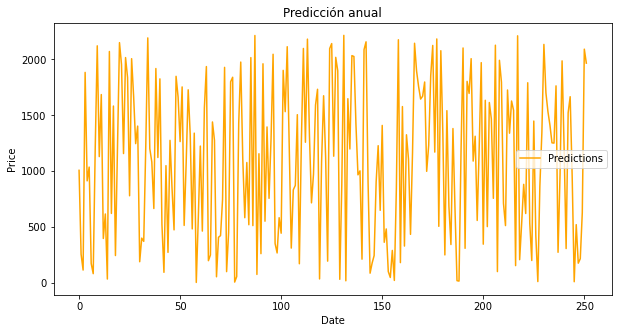

In [43]:
oneyear_df_pred["Predictions"].plot(figsize=(10, 5), title="Predicción anual", color="orange")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

#### Predicción a tres meses

In [44]:
onemonth_df_pred = pd.read_csv("predicción_3_meses.csv")
buy_price = min(onemonth_df_pred["Predictions"])
sell_price = max(onemonth_df_pred["Predictions"])
onemonth_buy = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == buy_price]
onemonth_sell = onemonth_df_pred.loc[onemonth_df_pred["Predictions"] == sell_price]

print("Precio de Compra y Fecha")
print(onemonth_buy)
print("Precio de Venta y Fecha")
print(onemonth_sell)

Precio de Compra y Fecha
    Unnamed: 0  Predictions
58  2020-04-01     6.503776
Precio de Venta y Fecha
    Unnamed: 0  Predictions
34  2020-03-08  2192.080567


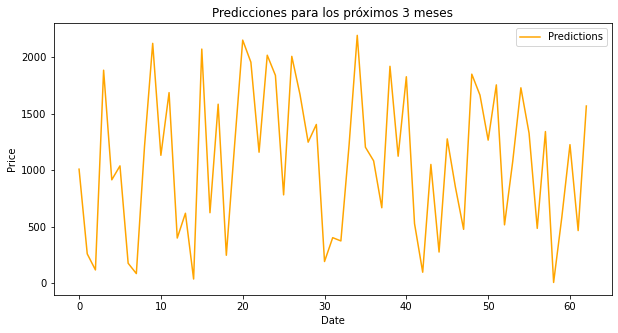

In [45]:
onemonth_df_pred["Predictions"].plot(figsize=(10, 5), title="Predicciones para los próximos 3 meses", color="orange")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [46]:
fivedays_df_pred = pd.read_csv("predicción_5_días.csv")
buy_price = min(fivedays_df_pred["Predictions"])
sell_price = max(fivedays_df_pred["Predictions"])
fivedays_buy = fivedays_df_pred.loc[fivedays_df_pred["Predictions"] == buy_price]
fivedays_sell = fivedays_df_pred.loc[fivedays_df_pred["Predictions"] == sell_price]
print("Precio de Compra y Fecha")
print(fivedays_buy)
print("Precio de Venta y Fecha")
print(fivedays_sell)

Precio de Compra y Fecha
   Unnamed: 0  Predictions
7  2020-02-10    84.998005
Precio de Venta y Fecha
   Unnamed: 0  Predictions
9  2020-02-12  2121.335838


#### Predicción a 10 días

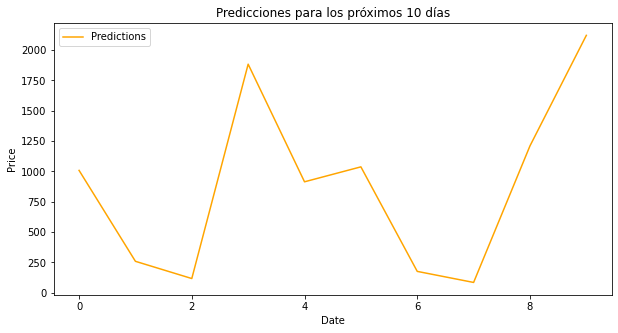

In [47]:
fivedays_df_pred["Predictions"].plot(figsize=(10, 5), title="Predicciones para los próximos 10 días", color="orange")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()